# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGA's over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
seifa1 = seifa[seifa.LGA_2011.astype(str).str[0] == '4']
lga = seifa1["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa1['LGA'] = lga
seifa1.head()

<ipython-input-3-535469b6af67>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa1["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
<ipython-input-3-535469b6af67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seifa1['LGA'] = lga


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
1228,40070,Adelaide (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,1036,ADELAIDE
1229,40070,Adelaide (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,909,ADELAIDE
1230,40070,Adelaide (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1141,ADELAIDE
1231,40070,Adelaide (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,19606,ADELAIDE
1232,40120,Adelaide Hills (DC),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,1077,ADELAIDE HILLS


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [4]:
LGA_scores = seifa1[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa1[seifa1.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

<ipython-input-4-bae92b4b492d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LGA_scores = seifa1[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")


INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874,874,1036,1013,19606
ADELAIDE HILLS,1083,1083,1077,1081,38601
ALEXANDRINA,1000,1000,969,987,23693
ANANGU PITJANTJATJARA,623,623,672,593,2433
BAROSSA,1028,1028,997,1017,22174


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [5]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


In [6]:
print(len(sa_vouchers_scores.Voucher_Sport.unique()), "Sports")
print(len(sa_vouchers_scores.Participant_LGA.unique()), "LGA's")
print(sa_vouchers_scores.Voucher_Claim_Year.unique())

50 Sports
69 LGA's
[2015 2016 2017]


In [7]:
sa_vouchers_scores["Voucher_Sport"].count

<bound method Series.count of 0         Australian Rules
1         Australian Rules
2               Gymnastics
3               Gymnastics
4               Gymnastics
                ...       
127521             Netball
127522             Netball
127523             Netball
127524             Netball
127525             Netball
Name: Voucher_Sport, Length: 127526, dtype: object>

### 1) Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?

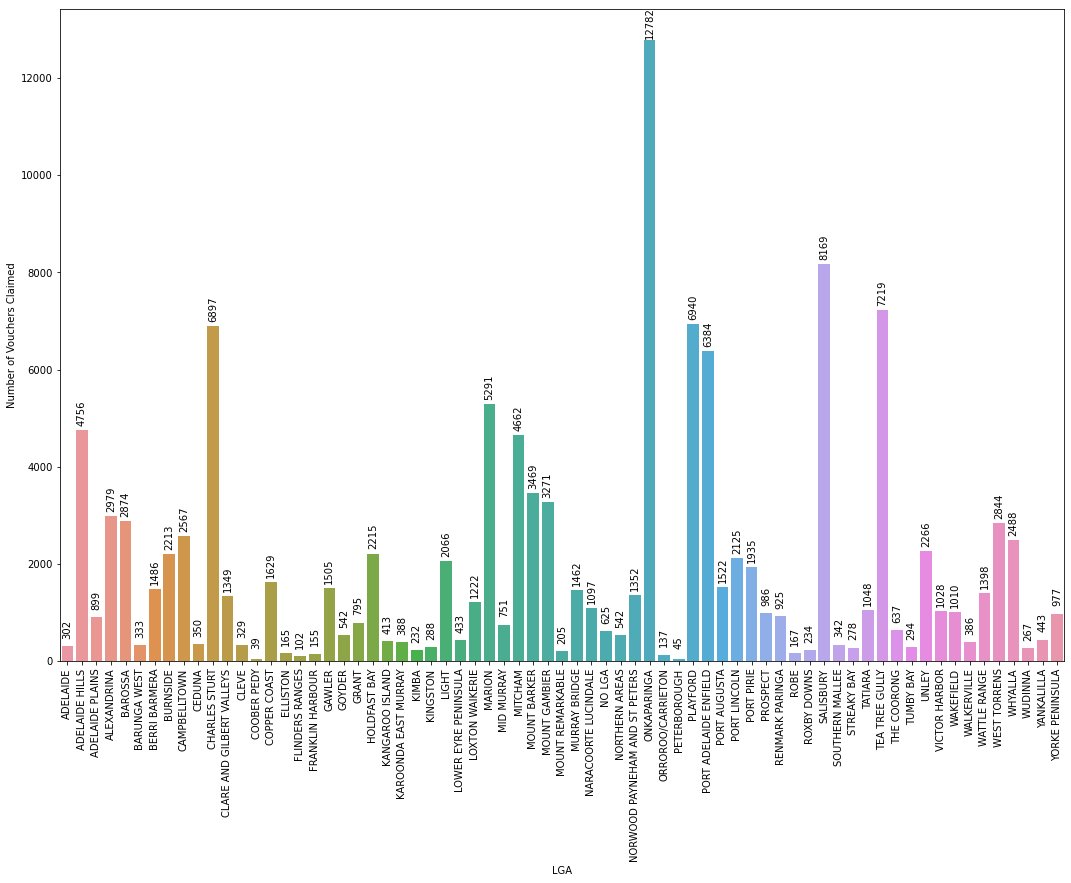

In [8]:
dat1 = sa_vouchers_scores.groupby(["Participant_LGA"], as_index=False).size()
plt.figure(figsize = (18,12))
plot1 = sns.barplot(x=dat1["Participant_LGA"], y=dat1["size"])

plot1.set(xlabel="LGA", ylabel = "Number of Vouchers Claimed")
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.0f'), #Text to include in annotation
                   (p.get_x()+p.get_width()/2, p.get_height()), #Coordiantes of where the annotation should be
                   ha = 'center', va = 'center', #Alignment
                   xytext = (0, 17), #To make it look cleaner
                   textcoords = 'offset points', rotation=90) #Rotating the text 90 degrees
plt.setp(plot1.get_xticklabels(), rotation=90)
plt.show()

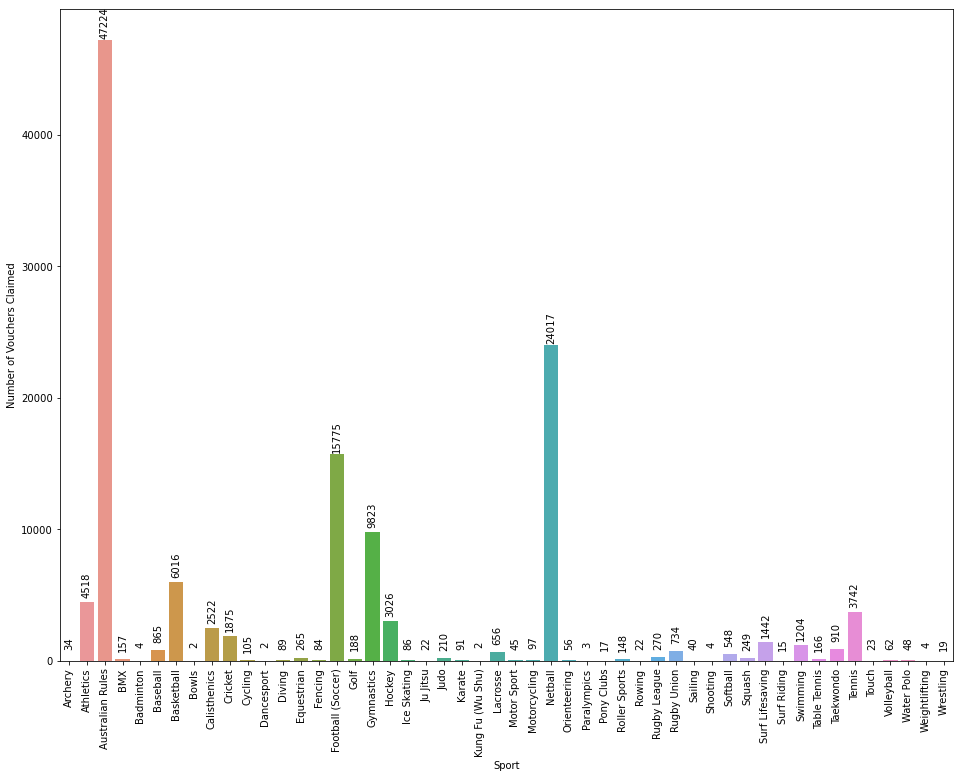

In [9]:
dat2 = sa_vouchers_scores.groupby(["Voucher_Sport"], as_index=False).size()
plt.figure(figsize = (16,12))
plot2 = sns.barplot(x=dat2["Voucher_Sport"], y=dat2["size"])
plot2.set(xlabel="Sport", ylabel = "Number of Vouchers Claimed")
plt.setp(plot2.get_xticklabels(), rotation=90)
for p in plot2.patches:
    plot2.annotate(format(p.get_height(), '.0f'), #Text to include in annotation
                   (p.get_x()+p.get_width()/2, p.get_height()), #Coordiantes of where the annotation should be
                    ha = 'center', va = 'center', #Alignment
                   xytext = (0, 17), #To make it look cleaner
                   textcoords = 'offset points', rotation=90) #Rotating the text 90 degrees
plt.show()
                   

#### Analysis

Looking at the above graphs we can see that both LGA's and Sports are not evenly distributed.

For LGA's, Onkaparinga has the most voucher's claimed at 12782 followed by Salisbury and Tea Tree Gully at 8169 and 7129 respectively. Coober Pedy has claimed the least number of vouchers at just 39 over three years.

The sport that was picked the most is Australian Rules (47224) which is almost double the amount of the next highest, Netball. (24107). This is followed by Football (Soccer) at 15775. Bowls, Dancesport and Kung Fu (Wu Shu) are the least picked with only 2 vouchers each.

### 2) Are some sports more popular in different parts of the state?

In [10]:
dat3 = sa_vouchers_scores.groupby(["Participant_LGA", "Voucher_Sport"], as_index=False).size()
dat3

,Participant_LGA,Voucher_Sport,size
0,ADELAIDE,Athletics,16
1,ADELAIDE,Australian Rules,130
2,ADELAIDE,Baseball,1
3,ADELAIDE,Basketball,4
4,ADELAIDE,Calisthenics,1
...,...,...,...
1152,YORKE PENINSULA,Motorcycling,2
1153,YORKE PENINSULA,Netball,313
1154,YORKE PENINSULA,Surf Lifesaving,4
1155,YORKE PENINSULA,Taekwondo,87


In [11]:
sport_lga = dat3.pivot(index='Voucher_Sport',columns='Participant_LGA', values='size')
sport_lga = sport_lga.replace(np.nan, 0)
sport_lga.head(10)

Participant_LGA,ADELAIDE,ADELAIDE HILLS,ADELAIDE PLAINS,ALEXANDRINA,BAROSSA,BARUNGA WEST,BERRI BARMERA,BURNSIDE,CAMPBELLTOWN,CEDUNA,...,UNLEY,VICTOR HARBOR,WAKEFIELD,WALKERVILLE,WATTLE RANGE,WEST TORRENS,WHYALLA,WUDINNA,YANKALILLA,YORKE PENINSULA
Voucher_Sport,,,,,,,,,,,,,,,,,,,,,
Archery,0.0,3.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
Athletics,16.0,204.0,3.0,62.0,158.0,1.0,10.0,203.0,162.0,14.0,...,115.0,39.0,30.0,20.0,86.0,114.0,15.0,29.0,10.0,30.0
Australian Rules,130.0,1412.0,485.0,980.0,1196.0,86.0,545.0,747.0,1186.0,211.0,...,900.0,368.0,402.0,146.0,652.0,907.0,569.0,44.0,214.0,309.0
BMX,0.0,2.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Badminton,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baseball,1.0,11.0,3.0,0.0,6.0,0.0,13.0,38.0,11.0,0.0,...,21.0,0.0,0.0,0.0,20.0,12.0,0.0,0.0,0.0,0.0
Basketball,4.0,48.0,15.0,204.0,341.0,12.0,18.0,36.0,40.0,0.0,...,63.0,129.0,61.0,6.0,85.0,70.0,605.0,0.0,1.0,87.0
Bowls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Calisthenics,1.0,62.0,23.0,5.0,9.0,0.0,0.0,14.0,26.0,0.0,...,36.0,1.0,12.0,4.0,7.0,45.0,15.0,0.0,0.0,0.0


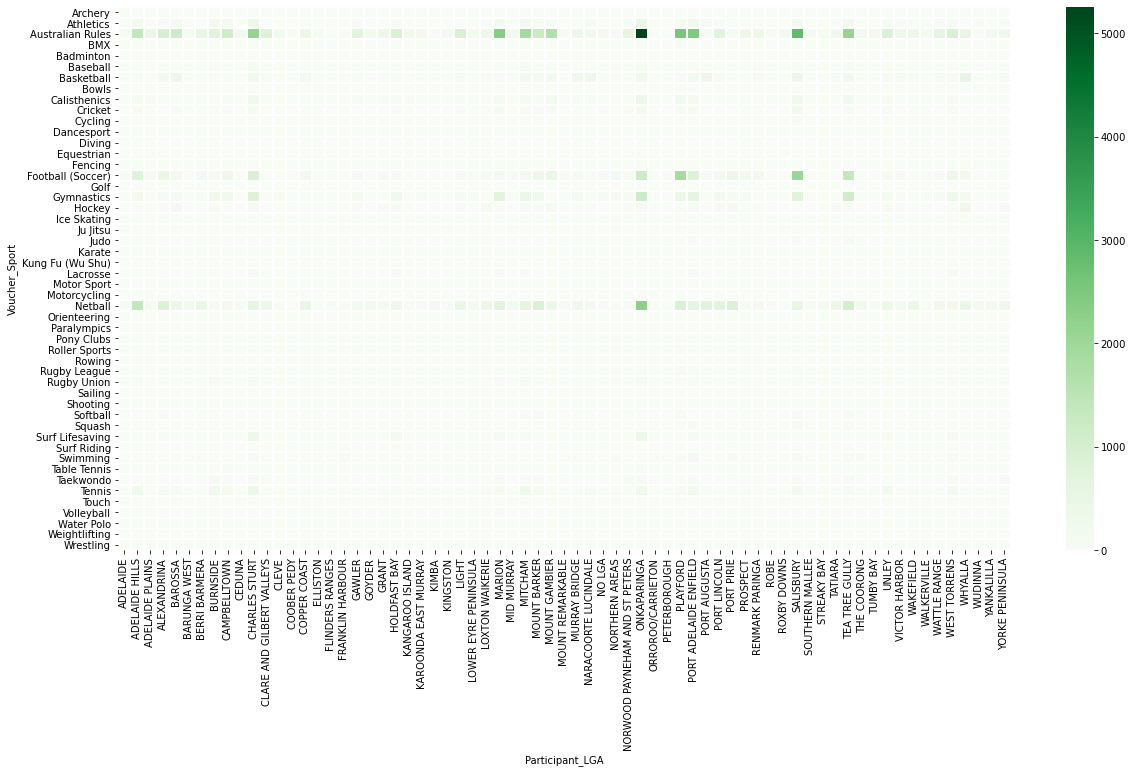

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(sport_lga, linewidth = 1, cmap="Greens")
plt.show()

### Analysis

Looking at the heatmap we see that in general Australian Rules is the most popular sport in all the LGA's. In Onkaparinga the most popular sport is Australian Rules followed by Netball whereas in Port Augusta and Port Lincoln we see that Netball is the most popular sport followed by Australian Rules. We do see some differences in the 2nd most popular sport in different LGA's.  In Salisbury, Peterborough and Tea Tree Gully we see that Football (Soccer) is the 2nd most popular sport after Australian Rules which is different compared to Onkaprainga, Port Augusta and Port Lincoln.

### 3) Are any LGA's over/under represented in their use of vouchers?

In [13]:
dat5 = sa_vouchers_scores.groupby(['Participant_LGA'])
lga_rep_size = pd.DataFrame({'Vouchers Used':dat5.size()})
lga_rep = lga_rep_size.join(LGA_scores['Population'], on = 'Participant_LGA')
lga_rep['Vouchers Used(%)'] = lga_rep['Vouchers Used']*100/lga_rep['Vouchers Used'].sum()
lga_rep = lga_rep.replace(np.nan, 0)
lga_rep = lga_rep.reset_index()

In [14]:
lga_rep

,Participant_LGA,Vouchers Used,Population,Vouchers Used(%)
0,ADELAIDE,302,19606.0,0.236814
1,ADELAIDE HILLS,4756,38601.0,3.729436
2,ADELAIDE PLAINS,899,0.0,0.704954
3,ALEXANDRINA,2979,23693.0,2.335994
4,BAROSSA,2874,22174.0,2.253658
...,...,...,...,...
64,WEST TORRENS,2844,54932.0,2.230133
65,WHYALLA,2488,22070.0,1.950975
66,WUDINNA,267,1256.0,0.209369
67,YANKALILLA,443,4406.0,0.347380


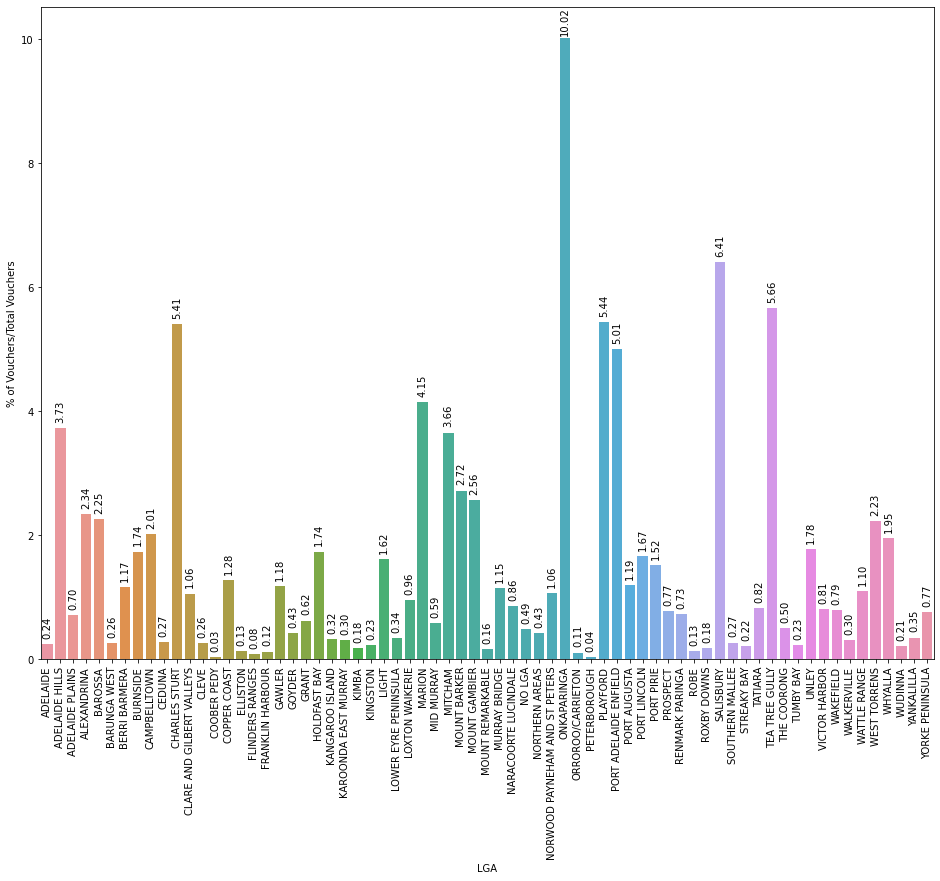

In [15]:
plt.figure(figsize = (16,12))
plot3 = sns.barplot(x=lga_rep["Participant_LGA"], y=lga_rep["Vouchers Used(%)"])
plot3.set(xlabel="LGA", ylabel = "% of Vouchers/Total Vouchers")
plt.setp(plot3.get_xticklabels(), rotation=90)
for p in plot3.patches:
    plot3.annotate(format(p.get_height(), '.2f'), #Text to include in annotation
                   (p.get_x()+p.get_width()/2, p.get_height()), #Coordiantes of where the annotation should be
                   ha = 'center', va = 'center', #Alignment
                   xytext = (0, 17), #To make it look cleaner
                   textcoords = 'offset points', rotation=90) #Rotating the text 90 degrees
plt.show()

### Analysis

Ideally for a balanced voucher distribution across all LGA's we should get 1.45% Voucher usage for each LGA.

LGA's like Onkaparinga (10% of the total vouchers) and Salisbury(6.41%)  and a few others seem to be the areas where most of the vouchers are used and are over represented whereas Coober Pedy (0.02%) and Peterborough (0.04%) are definitely under represented.

### 4) Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

In [16]:
lga_seifa = lga_rep_size.join(LGA_scores, on = 'Participant_LGA')

In [17]:
lga_seifa

,Vouchers Used,IEO,IER,IRSAD,IRSD,Population
Participant_LGA,,,,,,
ADELAIDE,302,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,4756,1083.0,1083.0,1077.0,1081.0,38601.0
ADELAIDE PLAINS,899,NaN,NaN,NaN,NaN,NaN
ALEXANDRINA,2979,1000.0,1000.0,969.0,987.0,23693.0
BAROSSA,2874,1028.0,1028.0,997.0,1017.0,22174.0
...,...,...,...,...,...,...
WEST TORRENS,2844,949.0,949.0,989.0,998.0,54932.0
WHYALLA,2488,905.0,905.0,897.0,905.0,22070.0
WUDINNA,267,1008.0,1008.0,999.0,1023.0,1256.0


Dropping the rows where we have NaN values.

In [18]:
lga_seifa = lga_seifa.dropna()
lga_seifa = lga_seifa.drop(["Population"], axis=1)
lga_seifa = lga_seifa.reset_index()

In [19]:
lga_seifa

,Participant_LGA,Vouchers Used,IEO,IER,IRSAD,IRSD
0,ADELAIDE,302,874.0,874.0,1036.0,1013.0
1,ADELAIDE HILLS,4756,1083.0,1083.0,1077.0,1081.0
2,ALEXANDRINA,2979,1000.0,1000.0,969.0,987.0
3,BAROSSA,2874,1028.0,1028.0,997.0,1017.0
4,BARUNGA WEST,333,981.0,981.0,940.0,954.0
...,...,...,...,...,...,...
57,WEST TORRENS,2844,949.0,949.0,989.0,998.0
58,WHYALLA,2488,905.0,905.0,897.0,905.0
59,WUDINNA,267,1008.0,1008.0,999.0,1023.0
60,YANKALILLA,443,990.0,990.0,957.0,972.0


In [20]:
print(lga_seifa.corr())

               Vouchers Used       IEO       IER     IRSAD      IRSD
Vouchers Used       1.000000  0.004747  0.004747  0.054572  0.034751
IEO                 0.004747  1.000000  1.000000  0.778839  0.846423
IER                 0.004747  1.000000  1.000000  0.778839  0.846423
IRSAD               0.054572  0.778839  0.778839  1.000000  0.985035
IRSD                0.034751  0.846423  0.846423  0.985035  1.000000


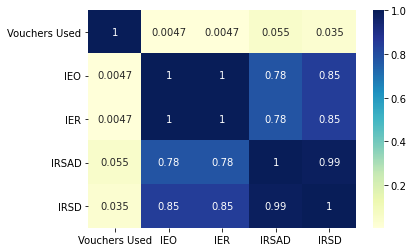

In [21]:
sns.heatmap(lga_seifa.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [22]:
lga_seifa = lga_seifa.sort_values(by=['Vouchers Used'])

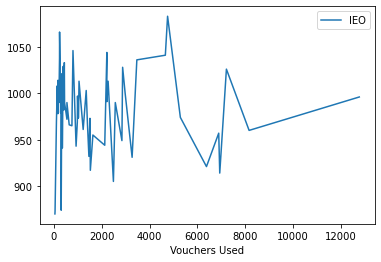

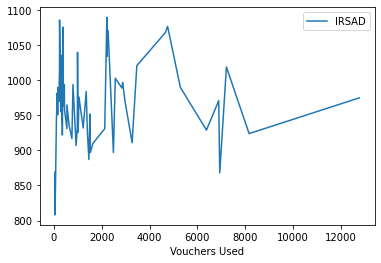

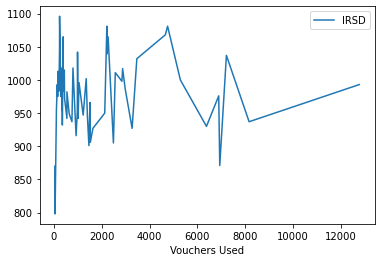

In [23]:
lga_seifa.plot(x='Vouchers Used', y='IEO', kind='line')
lga_seifa.plot(x='Vouchers Used', y='IRSAD', kind='line')
lga_seifa.plot(x='Vouchers Used', y='IRSD', kind='line')
plt.show()

### Analysis

Looking at the correlation values there doesn't seem to be a high coorealation between the various Sefia Measures and Voucher Usage.

Looking at the graphs this is confirmed as the regions with low seifa measure scores are not the areas with highest voucher usage. We do see that some of the regions with higher SEIFA measures, i.e the "better off" regions, do not use as many vouchers as those with lower SEIFA measure scores but overall there doesn't seem to be much of a relationship.

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [24]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [25]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
seifa2 = seifa[seifa.LGA_2011.astype(str).str[0] == '3']
lga1 = seifa2["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa2['LGA'] = lga1
LGA_scores2 = seifa2[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_pop2 = seifa2[seifa2.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores2['Population'] = LGA_pop2.IEO
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RCS]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores2, on='LGA')
qld_vouchers_scores.head()

<ipython-input-25-35d27b90d2dc>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga1 = seifa2["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
<ipython-input-25-35d27b90d2dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seifa2['LGA'] = lga1
<ipython-input-25-35d27b90d2dc>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LGA_scores2 = seifa2[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
<ipython-input-25-35d27b90d2dc>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].st

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


In [26]:
temp = qld_vouchers_scores.groupby(["Participation Activity"], as_index=False).size()
print(temp[:37])
print(temp[37:])

   Participation Activity  size
0                  *Other    13
1                 Archery     7
2               Athletics    97
3     Australian Football   548
4   BMX Bicycle Motocross    47
5                Baseball     5
6              Basketball   376
7           Body Boarding     3
8              Bowls Lawn     1
9                  Boxing    21
10              Broomball     1
11            Bushwalking   147
12           Calisthenics    12
13     Canoeing Outrigger     5
14           Cheerleading    37
15                Cricket    17
16                Cycling     1
17             Dancesport    28
18      Disability Sports     2
19         Dragon Boating     3
20             Equestrian    71
21      Football (Soccer)  2074
22                 Futsal     1
23                   Golf    18
24             Gymnastics   539
25                 Hockey   271
26             Ice Hockey     1
27            Ice Skating     5
28          Inline Hockey    15
29               Ju Jitsu    22
30      

In [27]:
print(dat2)

        Voucher_Sport   size
0             Archery     34
1           Athletics   4518
2    Australian Rules  47224
3                 BMX    157
4           Badminton      4
5            Baseball    865
6          Basketball   6016
7               Bowls      2
8        Calisthenics   2522
9             Cricket   1875
10            Cycling    105
11         Dancesport      2
12             Diving     89
13         Equestrian    265
14            Fencing     84
15  Football (Soccer)  15775
16               Golf    188
17         Gymnastics   9823
18             Hockey   3026
19        Ice Skating     86
20           Ju Jitsu     22
21               Judo    210
22             Karate     91
23   Kung Fu (Wu Shu)      2
24           Lacrosse    656
25        Motor Sport     45
26       Motorcycling     97
27            Netball  24017
28       Orienteering     56
29        Paralympics      3
30         Pony Clubs     17
31      Roller Sports    148
32             Rowing     22
33       Rugby

To do a somewhat comparable analysis we will edit the names of Similar Participation Activity in QLD to match the Sports in SA.

In [28]:
qld_vouchers_scores['Participation Activity'] = qld_vouchers_scores['Participation Activity'].replace(['Australian Football'], 'Australian Rules')
qld_vouchers_scores['Participation Activity'] = qld_vouchers_scores['Participation Activity'].replace(['BMX Bicycle Motocross'], 'BMX')
qld_vouchers_scores['Participation Activity'] = qld_vouchers_scores['Participation Activity'].replace(['Bowls Lawn'], 'Bowls')
qld_vouchers_scores['Participation Activity'] = qld_vouchers_scores['Participation Activity'].replace(['Karting'], 'Motor Sport') ##Since OLD only has karting as a motorsport
qld_vouchers_scores['Participation Activity'] = qld_vouchers_scores['Participation Activity'].replace(['Pony Club'], 'Pony Clubs')

In [29]:
print(set(qld_vouchers_scores['Participation Activity']))

{'Inline Hockey', 'Bushwalking', 'Football (Soccer)', 'Basketball', 'Disability Sports', 'Archery', 'Gymnastics', 'Cheerleading', 'Karate', 'Skipping', 'Tennis', 'Shooting', 'Surfing', 'Rugby League', 'T-Ball', 'Boxing', 'Baseball', 'Athletics', 'Rowing', 'Canoeing Outrigger', 'Roller Sports', 'Taekwondo', 'Calisthenics', '*Other', 'Equestrian', 'Life Saving Surf', 'Squash', 'Weightlifting', 'Motor Sport', 'Riding for the Disabled', 'Swimming Synchronised', 'Zen Do Kai Martial Arts', 'Tenpin Bowling', 'Futsal', 'Hockey', 'Judo', 'Rugby Union', 'Bowls', 'Dragon Boating', 'Netball', 'Swimming', 'Motor Cycling', 'Dancesport', 'BMX', 'Kayaking', 'Oztag', 'Rock Climbing', 'Golf', 'Cycling', 'Polocrosse', 'Pony Clubs', 'Sailing', 'Australian Rules', 'Body Boarding', 'Touch', 'Parkour', 'Table Tennis', 'Ice Hockey', 'Mixed Martial Arts', 'Broomball', 'Ice Skating', 'Ju Jitsu', 'Softball', 'Trail Bike Riding', 'Cricket', 'Trampolining'}


## COMPARABLE ANALYSIS

To do a comparable analysis we need to ensure the data is from the same year or years. Since the QLD data seems to be for 2015 data, we will use only 2015 data from the SA data.

In [30]:
sa_2015 = sa_vouchers_scores[sa_vouchers_scores["Voucher_Claim_Year"]==2015]

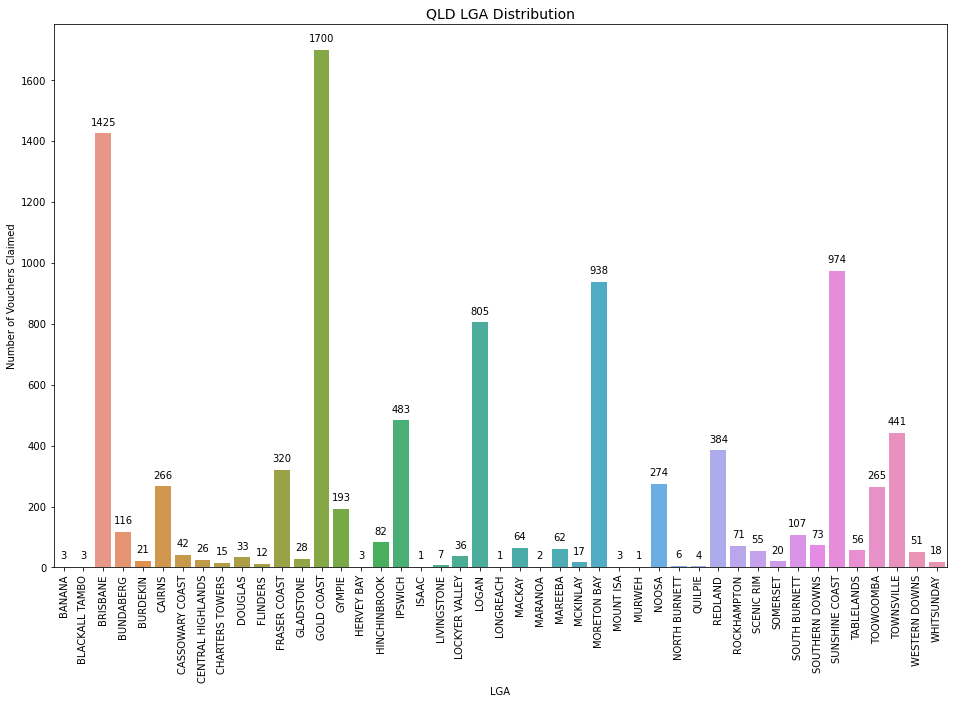

In [31]:
dat6 = qld_vouchers_scores.groupby(["LGA"], as_index=False).size()
plt.figure(figsize = (16,10))
plot3 = sns.barplot(x=dat6["LGA"], y=dat6["size"])

plot3.set(xlabel="LGA", ylabel = "Number of Vouchers Claimed")
for p in plot3.patches:
    plot3.annotate(format(p.get_height(), '.0f'), #Text to include in annotation
                   (p.get_x()+p.get_width()/2, p.get_height()), #Coordiantes of where the annotation should be
                   ha = 'center', va = 'center', #Alignment
                   xytext = (0, 11), #To make it look cleaner
                   textcoords = 'offset points') #Rotating the text 90 degrees
plt.setp(plot3.get_xticklabels(), rotation=90)
plt.title('QLD LGA Distribution', fontsize=14)
plt.show()

We see that Gold coast is the leader in terms of vouchers used at 1700 as compared to 1425 of Brisbane. This is followed by Sunshine Coast (974), Moreton Bay (938) and Logan (805). Isaac, Longreach and Murweh have only used 1 voucher.

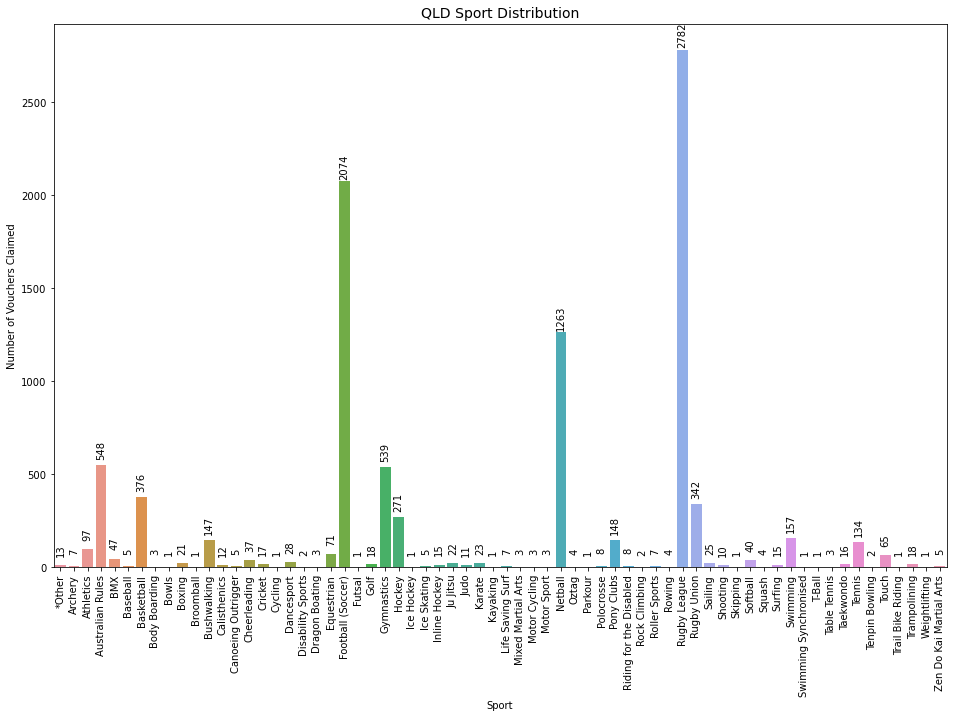

In [32]:
dat7 = qld_vouchers_scores.groupby(['Participation Activity'], as_index=False).size()
plt.figure(figsize = (16,10))
plot4 = sns.barplot(x=dat7['Participation Activity'], y=dat7["size"])
plot4.set(xlabel="Sport", ylabel = "Number of Vouchers Claimed")
plt.setp(plot4.get_xticklabels(), rotation=90)
for p in plot4.patches:
    plot4.annotate(format(p.get_height(), '.0f'), #Text to include in annotation
                   (p.get_x()+p.get_width()/2, p.get_height()), #Coordiantes of where the annotation should be
                    ha = 'center', va = 'center', #Alignment
                   xytext = (0, 15), #To make it look cleaner
                   textcoords = 'offset points', rotation=90) #Rotating the text 90 degrees
plt.title('QLD Sport Distribution', fontsize=14)
plt.show()    

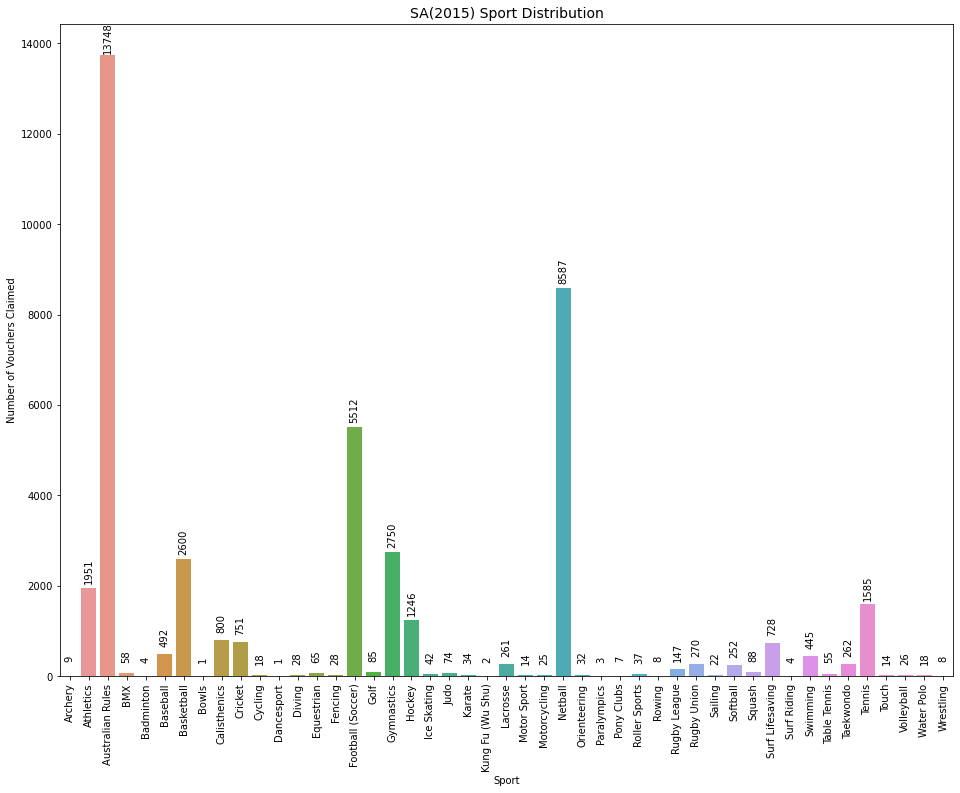

In [33]:
sa_dat7 = sa_2015.groupby(["Voucher_Sport"], as_index=False).size()
plt.figure(figsize = (16,12))
plot5 = sns.barplot(x=sa_dat7["Voucher_Sport"], y=sa_dat7["size"])
plot5.set(xlabel="Sport", ylabel = "Number of Vouchers Claimed")
plt.setp(plot5.get_xticklabels(), rotation=90)
for p in plot5.patches:
    plot5.annotate(format(p.get_height(), '.0f'), #Text to include in annotation
                   (p.get_x()+p.get_width()/2, p.get_height()), #Coordiantes of where the annotation should be
                    ha = 'center', va = 'center', #Alignment
                   xytext = (0, 17), #To make it look cleaner
                   textcoords = 'offset points', rotation=90) #Rotating the text 90 degrees
plt.title('SA(2015) Sport Distribution', fontsize=14)
plt.show()                  

### Analysis

From the graphs it is clear that way more vouchers were used in SA as compared to QLD.

For sports, Rugby League was the most popular sport in QLD with 2782 vouchers used. This is followed by Football (2074) and Netball (1263). American Rules was at 548 vouchers only.

When compared to the SA data (for 2015) where American Rules is at 13748 Vouchers followed by Netball at 8587 while Rugby League is at only 147 Vouchers.

In [34]:
dat8 = qld_vouchers_scores.groupby(["LGA", "Participation Activity"], as_index=False).size()
qld_sport_lga = dat8.pivot(index='Participation Activity',columns='LGA', values='size')
qld_sport_lga = qld_sport_lga.replace(np.nan, 0)
qld_sport_lga.head(10)

LGA,BANANA,BLACKALL TAMBO,BRISBANE,BUNDABERG,BURDEKIN,CAIRNS,CASSOWARY COAST,CENTRAL HIGHLANDS,CHARTERS TOWERS,DOUGLAS,...,SCENIC RIM,SOMERSET,SOUTH BURNETT,SOUTHERN DOWNS,SUNSHINE COAST,TABLELANDS,TOOWOOMBA,TOWNSVILLE,WESTERN DOWNS,WHITSUNDAY
Participation Activity,,,,,,,,,,,,,,,,,,,,,
*Other,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Archery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Athletics,0.0,2.0,1.0,3.0,0.0,17.0,0.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,16.0,0.0,1.0
Australian Rules,0.0,0.0,68.0,3.0,0.0,24.0,0.0,0.0,0.0,4.0,...,0.0,0.0,1.0,3.0,63.0,0.0,26.0,4.0,1.0,0.0
BMX,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,1.0,0.0,5.0,0.0,0.0
Baseball,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Basketball,0.0,0.0,78.0,9.0,3.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,20.0,0.0,4.0,21.0,0.0,0.0
Body Boarding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Bowls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


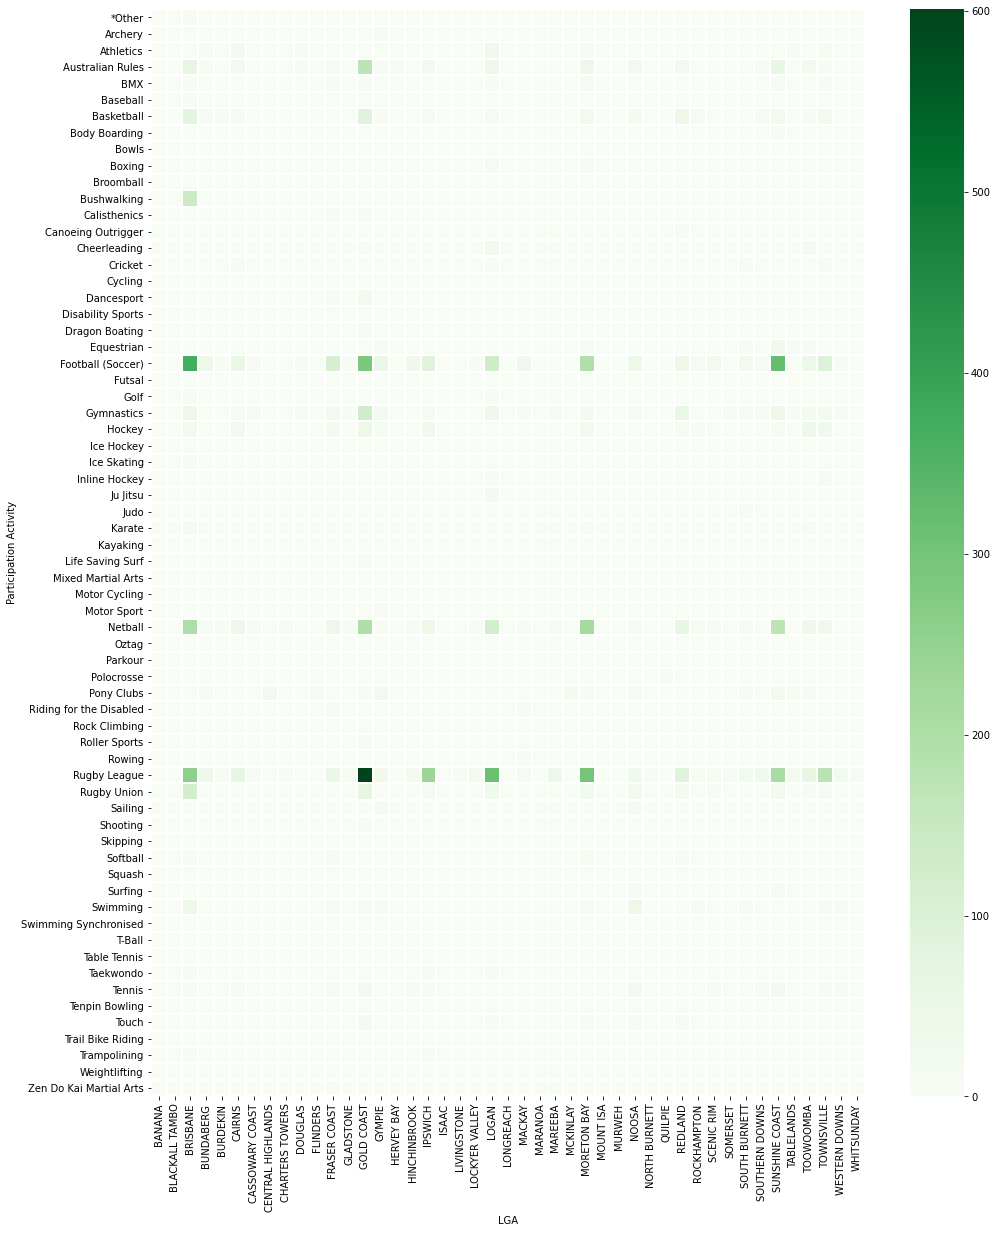

In [35]:
plt.figure(figsize=(16,20))
sns.heatmap(qld_sport_lga, linewidth = 1, cmap="Greens")
plt.show()

### Analysis

It is much easier to see a distinction of different sports being popular in different LGA's in Queensland as compared to South Australia.

We do see that some sports are more famous in different LGA's. In Gold Coast, Rugby league is the most popular sport followed by Football (Soccer). However in Brisbane and Sunshine Coast Football (Soccer) is most popular sport followed by Rugby League.

In [36]:
dat8 = qld_vouchers_scores.groupby(['LGA'])
qld_lga_rep_size = pd.DataFrame({'Vouchers Used':dat8.size()})
qld_lga_seifa = qld_lga_rep_size.join(LGA_scores2, on = 'LGA')
qld_lga_seifa = qld_lga_seifa.dropna()
qld_lga_seifa = qld_lga_seifa.drop(["Population"], axis=1)
qld_lga_seifa = qld_lga_seifa.reset_index()
print(qld_lga_seifa.corr())

               Vouchers Used       IEO       IER     IRSAD      IRSD
Vouchers Used       1.000000  0.221289  0.221289  0.453669  0.348943
IEO                 0.221289  1.000000  1.000000  0.867428  0.883455
IER                 0.221289  1.000000  1.000000  0.867428  0.883455
IRSAD               0.453669  0.867428  0.867428  1.000000  0.985581
IRSD                0.348943  0.883455  0.883455  0.985581  1.000000


In [37]:
sa_dat8 = sa_2015.groupby(["Participant_LGA"])
sa15_lga_rep_size = pd.DataFrame({'Vouchers Used':sa_dat8.size()})
sa15_lga_seifa = sa15_lga_rep_size.join(LGA_scores, on = 'Participant_LGA')
sa15_lga_seifa = sa15_lga_seifa.dropna()
sa15_lga_seifa = sa15_lga_seifa.drop(["Population"], axis=1)
sa15_lga_seifa = sa15_lga_seifa.reset_index()
print(sa15_lga_seifa.corr())

               Vouchers Used       IEO       IER     IRSAD      IRSD
Vouchers Used       1.000000 -0.025605 -0.025605  0.038890  0.016411
IEO                -0.025605  1.000000  1.000000  0.765748  0.834873
IER                -0.025605  1.000000  1.000000  0.765748  0.834873
IRSAD               0.038890  0.765748  0.765748  1.000000  0.984629
IRSD                0.016411  0.834873  0.834873  0.984629  1.000000


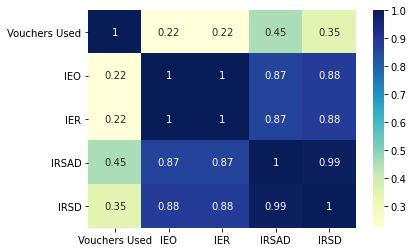

In [38]:
sns.heatmap(qld_lga_seifa.corr(), cmap="YlGnBu", annot=True)
plt.show()

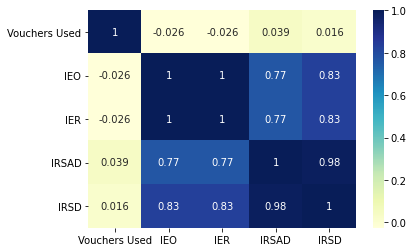

In [39]:
sns.heatmap(sa15_lga_seifa.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [40]:
qld_lga_seifa = qld_lga_seifa.sort_values(by=['Vouchers Used'])
sa15_lga_seifa = sa15_lga_seifa.sort_values(by=['Vouchers Used'])

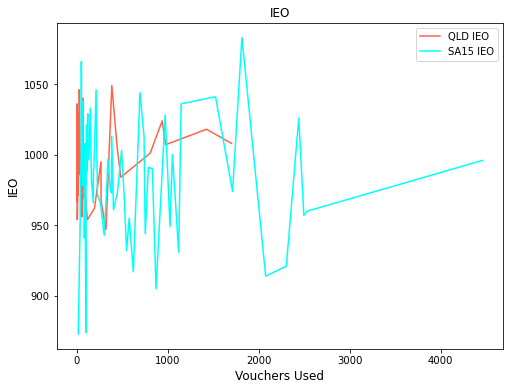

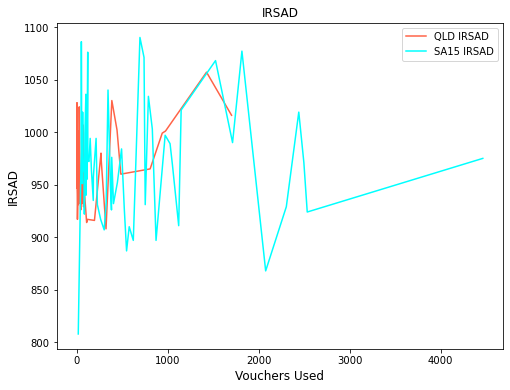

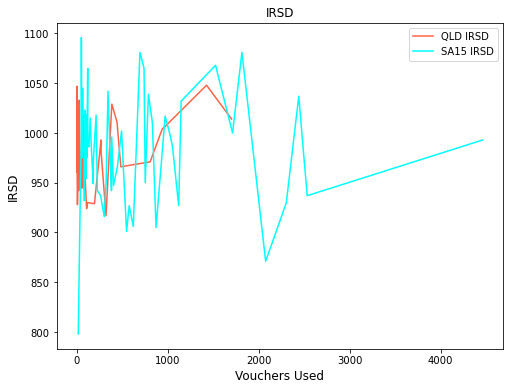

In [41]:
plt.figure(figsize=(8,6))
plt.plot(qld_lga_seifa['Vouchers Used'], qld_lga_seifa['IEO'], label = 'QLD IEO', c = 'tomato')
plt.plot(sa15_lga_seifa['Vouchers Used'], sa15_lga_seifa['IEO'], label = 'SA15 IEO', c = 'cyan')
plt.title("IEO")
plt.legend(loc='upper right')
plt.xlabel("Vouchers Used", size=12)
plt.ylabel("IEO", size=12)


plt.figure(figsize=(8,6))
plt.plot(qld_lga_seifa['Vouchers Used'], qld_lga_seifa['IRSAD'], label = 'QLD IRSAD', c = 'tomato')
plt.plot(sa15_lga_seifa['Vouchers Used'], sa15_lga_seifa['IRSAD'], label = 'SA15 IRSAD', c = 'cyan')
plt.title("IRSAD")
plt.legend(loc='upper right')
plt.xlabel("Vouchers Used", size=12)
plt.ylabel("IRSAD", size=12)

plt.figure(figsize=(8,6))
plt.plot(qld_lga_seifa['Vouchers Used'], qld_lga_seifa['IRSD'], label = 'QLD IRSD', c = 'tomato')
plt.plot(sa15_lga_seifa['Vouchers Used'], sa15_lga_seifa['IRSD'], label = 'SA15 IRSD', c = 'cyan')
plt.title("IRSD")
plt.legend(loc='upper right')
plt.xlabel("Vouchers Used", size=12)
plt.ylabel("IRSD", size=12)
plt.show()

### Analysis

Looking at the above graphs we see that both regions have a similar usage of vouchers regardless of their SEIFA measures. However South Australia has a lower and higher score in their LGA's while Queensland is more balanced.